In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 1. Regression: order-$k$ polynomials

1. Convince yourself, that the least squares solution is $\hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$.
2. What condition does the data matrix have to fulfill in order for the solution to exist?
3. Find the solution for $k=0$
4. Adding l2-regularizer, convince yourself that $\hat w = (\Phi^T \Phi + \lambda I)^{-1} \Phi^Ty$.

### Solution 1

1. Convince yourself, that the least squares solution is $\hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$.

We optimize the following convex objective:

$\hat w = \arg \min_{w} \frac{1}{2} \Vert y - \Phi w \Vert^2$

It's equivalent to minimize the following, where we dropped terms not depending on w:

$\frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T y$

Taking $\nabla_w$ and setting to 0:

$\Phi^T\Phi w = \Phi^Ty$

2. What condition does the data matrix have to fulfill in order for the solution to exist?

The system matrix $\Phi^T \Phi$ must have full rank. So the number of samples should be at least $k+1$.

3. Find the solution for $k=0$

If $k=0$, $\Phi$ is the constant $1$ vector. $\Phi^T\Phi = N$ and $\Phi^T y = \sum_i y_i$. Hence, $\hat w = \frac{1}{N} \sum_i y_i$, the average of the labels.

4. Adding l2-regularizer, convince yourself that $\hat w = (\Phi^T \Phi + \lambda I)^{-1} \Phi^Ty$.

Similar to 1., we add the regularizer and expand

$\hat w = \arg \min_{w} \frac{1}{2} \Vert y - \Phi w \Vert^2 + \frac{1}{2} \lambda \Vert w \Vert^2$

to

$\frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T y + \frac{1}{2} \lambda w^T w$

## Exercise 2. Generalization Error and Regularization

Consider the input space $\mathcal{X} = [-1,1]$ and $\mathcal{Y} = \mathbb{R}$, and the following ground-truth function:

$y = f(x) = 0.1 x^3 - 0.025 x^2 + 0.01 x + 0.2$

1. Draw a random training set of size 25, using the following rule:

$y = f(x) + \epsilon, x \sim \text{Uniform}([-1,1]), \epsilon \sim \mathcal{N}(0, 10^{-4})$

2. Draw a test set of size 100 using the ground-truth function above.
3. Fit an order $k$ polynomial and plot train and test error vs $k$ for $k = {0, \ldots, 15}$. Use the mean squared error $l(y, \hat y) = \frac{1}{N} \sum_i (y_i - \hat y_i)^2$ to compute train and test errors
4. For different $k=0,3,15$, draw training sets of growing size: $N=25,250,2500$. Plot test error vs the number of training points.
5. Repeat 4, but fix $k=15$, and plot train and test error vs $\lambda={0, 0.1, 1000}$, the regularization strenght of the l2 penalty

### Solution 2

In [3]:
from mlcourse import *
import numpy as np
from matplotlib import pyplot as plt

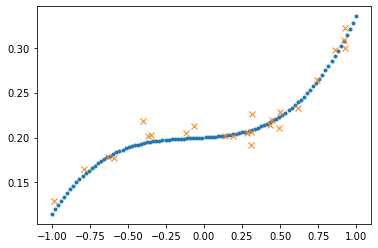

In [4]:
np.random.seed(12345)
N = 100
x_test = np.linspace(-1,1,N)
y_test = f_true(x_test)
plt.plot(x_test,y_test,'.')

x_train = np.sort(np.random.rand(25) * 2 - 1)
y_train = f_true(x_train) + np.random.randn(25) * 0.01
plt.plot(x_train, y_train, 'x')

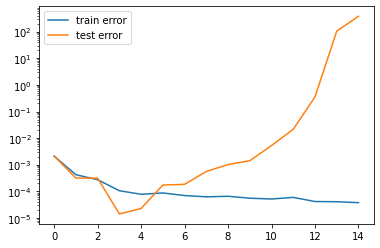

In [5]:
np.random.seed(12345)
ks = np.arange(15)
trials = 10 
train_errs = []
test_errs = []
for k in ks:
    train_err_trials = np.zeros(trials)
    test_err_trials = np.zeros(trials)
    for it in range(trials):
        
        x_train = np.random.rand(25) * 2 - 1
        y_train = f_true(x_train) + np.random.randn(25) * 0.01
        what = fit(x_train, y_train, k)
        yhat_train = predict(x_train, what)
        yhat_test = predict(x_test, what)
        train_err = mse(y_train, yhat_train)
        test_err = mse(y_test, yhat_test)
        train_err_trials[it] = train_err
        test_err_trials[it] = test_err
    train_errs.append(np.mean(train_err_trials))
    test_errs.append(np.mean(test_err_trials))
plt.semilogy(ks, train_errs, label='train error')
plt.semilogy(ks, test_errs, label='test error')
plt.legend()

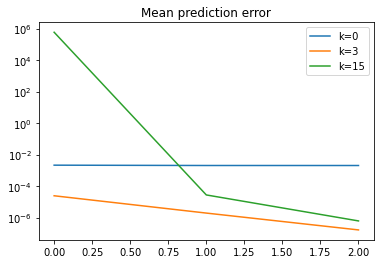

In [6]:
np.random.seed(12345)
ks = (0, 3, 15)
Ns = (25, 250,2500)
trials = 10
errors = np.zeros((len(Ns), len(ks), trials))

for it, k in enumerate(ks):
    for jt, N in enumerate(Ns):
        for kt in range(trials):
            x_train = np.random.rand(N) * 2 - 1
            y_train = f_true(x_train) + np.random.randn(N) * 0.01
            what = fit(x_train, y_train, k)
            yhat_test = predict(x_test, what)
            test_err = (mse(y_test, yhat_test))
            errors[jt, it, kt] = test_err
            
plt.figure()
for it, k in enumerate(ks):
    mu = np.mean(errors, 2)
    plt.semilogy(mu[:, it], label='k={}'.format(k))
plt.legend()
plt.title("Mean prediction error");
 

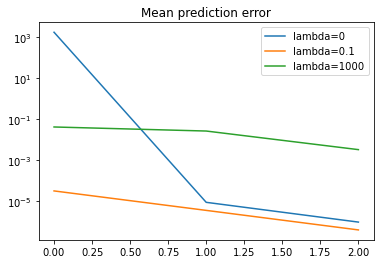

In [7]:
lambdas = [0, 0.1, 1000]
k = 15
Ns = (25, 250,2500)
trials = 10
errors = np.zeros((len(Ns), len(lambdas), trials))

for it, lam in enumerate(lambdas):
    for jt, N in enumerate(Ns):
        for kt in range(trials):
            x_train = np.random.rand(N) * 2 - 1
            y_train = f_true(x_train) + np.random.randn(N) * 0.01
            what = fit(x_train, y_train, k, lam)
            yhat_test = predict(x_test, what)
            test_err = (mse(y_test, yhat_test))
            errors[jt, it, kt] = test_err
            
plt.figure()
for it, l in enumerate(lambdas):
    mu = np.mean(errors, 2)
    plt.semilogy(mu[:, it], label='lambda={}'.format(l))
plt.legend()
plt.title("Mean prediction error");